# PyScanCf Example
- Author: Hamid Ali Syed
- Date: Feb 12, 2023

## PyScanCf Version: `1.0.23`

In [2]:
from pyscancf import pyscancf as pcf
import pyart
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [3]:
pwd

'/Users/syed44/Downloads/Git_Libs/PyScanCf_examples'

In [11]:
b_data = "data/goa16"
outdir = "data/cfradial"

In [15]:
!ls $b_data

GOA210516024101-IMD-B.nc   GOA210516024101-IMD-B.nc.5
GOA210516024101-IMD-B.nc.1 GOA210516024101-IMD-B.nc.6
GOA210516024101-IMD-B.nc.2 GOA210516024101-IMD-B.nc.7
GOA210516024101-IMD-B.nc.3 GOA210516024101-IMD-B.nc.8
GOA210516024101-IMD-B.nc.4 GOA210516024101-IMD-B.nc.9


- If your data structure is something like as shown in above cell which starts form `GOA210516024101-IMD-B.nc` to `GOA210516024101-IMD-B.nc.9`, it means this data is short range PPI i.e., type `B` data. And consists of 10 files.
- Remember the number `10` as we are going to assign it to variable `nf` in the code below, and scan_type will be "B" in that case as `scan_type="B"`.

In [18]:
c_data = "data/goa_c/"

In [19]:
!ls $c_data

GOA210515003646-IMD-C.nc   GOA210515004746-IMD-C.nc.1
GOA210515003646-IMD-C.nc.1 GOA210515005811-IMD-C.nc
GOA210515004746-IMD-C.nc   GOA210515005811-IMD-C.nc.1


- If you notice in this data that it is recorded at only two elevations, i.e., only the file ending with `.nc` is the first sweep and the file that ends with `.nc.1` is the last sweep in the type of data. This data is type `C`, or long range PPI, and I don't recommend converting it to grids. Here `nf=2`.
- Similarly, if you have data that is taking `C` type data at 3 different elevations, you have to use `scan_type ="C"` and `nf=3`

## New keywords `scan_type` & `nf` added to the arguments
Remember if you are working with IMD type `B` data, i.e., short range ppi, then the `nf` should be `10` (by default), these `10` individual sweeps make `1` full volume scan data.
Similarly, for type `C` data, `nf=2` (by default), otherwise you can modify it according to your file pattern by assigning that value to `nf` in the below given function.

In [26]:
# Test B type data
radar = pcf.cfrad(input_dir=b_data, output_dir=outdir, scan_type='B', nf=10)

Number of files:  10
Total number of files will be created:  1
Merging all scans in one file
Data merging done 
Total Time Elapsed:  0:35:53.553042


In [24]:
# Test C type data
pcf.cfrad(input_dir=c_data, output_dir=outdir, scan_type='C', nf=2)

Number of files:  6
Total number of files will be created:  3
Merging all scans in one file
Data merging done 
Total Time Elapsed:  0:31:11.675891


In [25]:
ls data/cfradial/

cfrad_GOA210515003646-IMD-C.nc  cfrad_GOA210516024101-IMD-B.nc
cfrad_GOA210515004746-IMD-C.nc  grid_GOA210516024101-IMD-B.nc
cfrad_GOA210515005811-IMD-C.nc


**You can see we have successfully converted the data to cfradail1 format using pcf.cfrad() function.**
- Now we can convert type B data to gridded data.

In [28]:
radar = pyart.io.read_cfradial("data/cfradial/cfrad_GOA210516024101-IMD-B.nc")

In [29]:
grid = pcf.get_grid(radar, grid_shape=(30, 500, 500), height=20, length=250)

In [36]:
plt.style.use('dark_background')

Generating Figures of Max-CAPPI, please be patient!
Figures saved


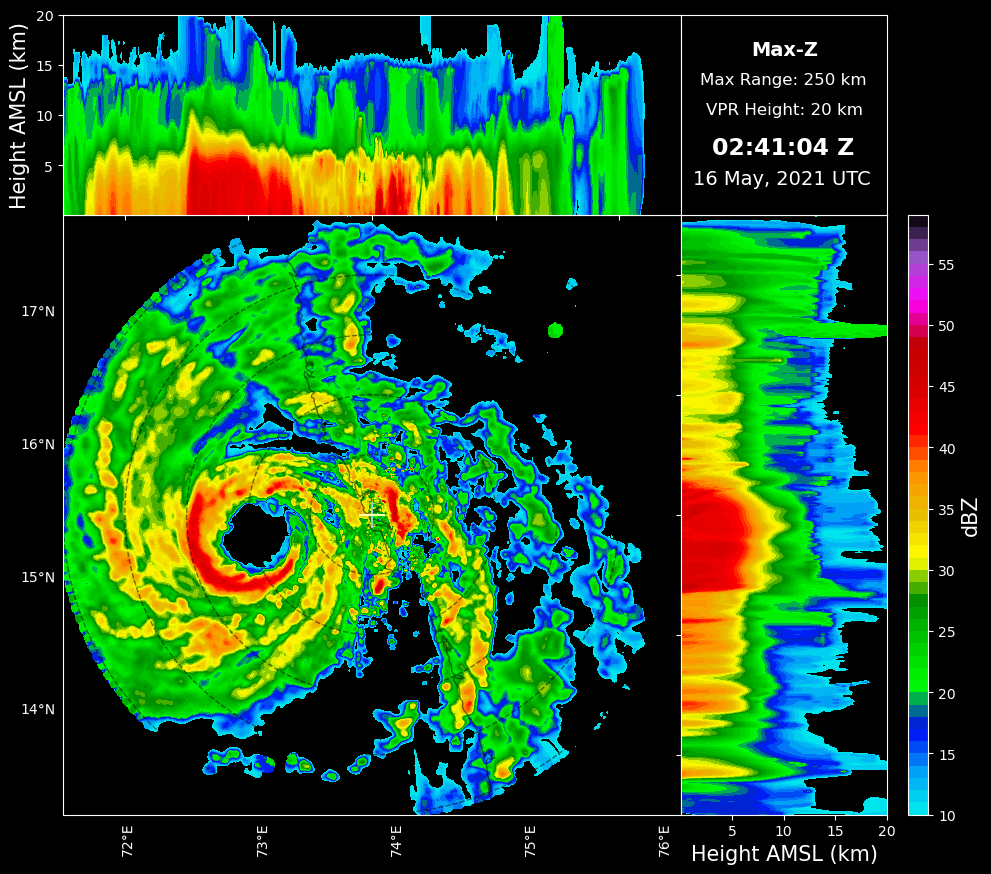

In [37]:
pcf.plot_cappi(grid, "REF")

In [38]:
radar = pyart.io.read('data/cfradial/cfrad_GOA210515003646-IMD-C.nc')

In [39]:
radar.fields.keys()

dict_keys(['REF', 'VELH', 'WIDTH'])

In [40]:
display = pyart.graph.RadarDisplay(radar)

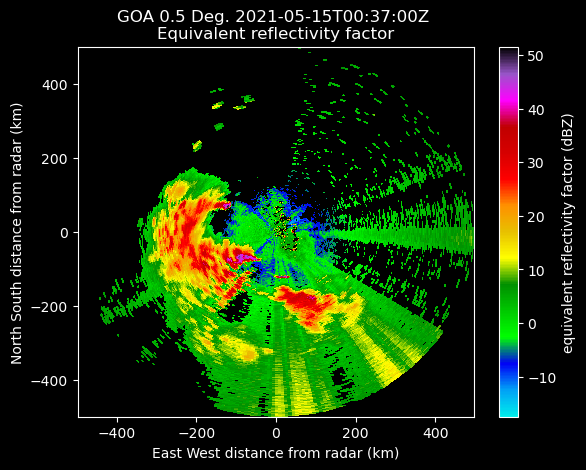

In [41]:
display.plot_ppi('REF',sweep=0,cmap='pyart_NWSRef')

In [42]:
import xarray as xr

In [43]:
ds = xr.open_dataset('data/cfradial/grid_GOA210516024101-IMD-B.nc')

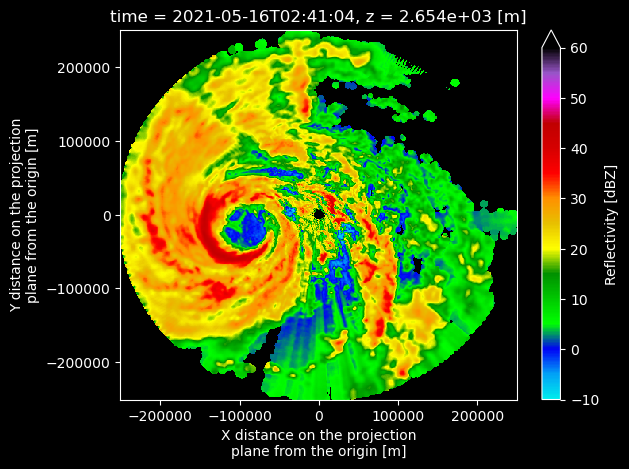

In [44]:
ds.REF[0,5].plot(cmap='pyart_NWSRef',vmin=-10,vmax=60)

## If your data is dual-pol, you can turn dualpol keyword to `True` in the `cfrad` function like
>`pcf.cfrad(indir=somedir, outdir=output_folder, scan_type='B', dualpol=True, nf=10)`